## 1. Library Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Driver model - Multiple regression 

In [54]:
driver_df = pd.read_csv("data/driver_data_mr_train.csv")

In [55]:
driver_df

,driver,position,gap_to_leader,fantasy_points
0,VER_r1,3,0.238,45
1,PER_r1,8,0.424,31
2,NOR_r1,5,0.294,16
3,LEC_r1,4,0.270,22
4,SAI_r1,1,0.000,36
...,...,...,...,...
75,SAR_r4,19,1.889,9
76,HUL_r4,16,1.576,10
77,TSU_r4,9,0.778,10
78,RIC_r4,13,1.119,-19


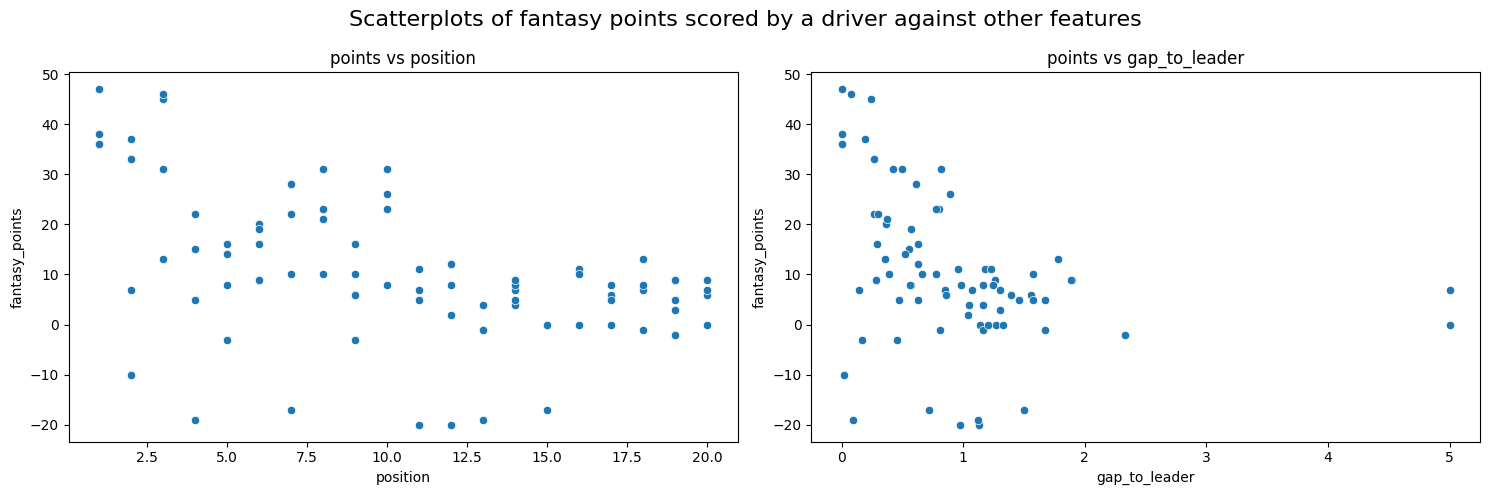

In [56]:
# Make sure the relationship looks linear
possible_features = ['position', 'gap_to_leader']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=driver_df, x=feature, y="fantasy_points", ax=axes[index])
    axes[index].set_title(f'points vs {feature}')

fig.suptitle("Scatterplots of fantasy points scored by a driver against other features", fontsize=16)
fig.tight_layout()

In [57]:
# Create the model with everything first
selected_features = ['position', 'gap_to_leader']
y_train = driver_df["fantasy_points"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = driver_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = driver_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['position', 'gap_to_leader'] Score: 0.23868659442965534
Feature: position Score Diff: 0.11688383115713097 Score: 0.12180276327252437
Feature: gap_to_leader Score Diff: 0.0018492348916560042 Score: 0.23683735953799934
Removed Feature: gap_to_leader
Features: ['position'] Score: 0.23683735953799934


In [131]:
# Extract Data
X = driver_df[['position', 'gap_to_leader']]
y = driver_df["fantasy_points"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[-1.17336982  1.09388546] 21.334957150881976


In [71]:
# make predictions on test data
y_pred = model.predict(X_test)
y_pred

array([24.72527057, 13.87588378,  2.37526851,  9.00366155, 12.12980954,
       21.41486026,  9.12482034, 12.22320277,  7.01148352, 18.25463636,
       -0.86951412,  7.45699448, -1.82679417,  0.95228437,  4.03173574,
       -3.51481316])

In [132]:
model.score(X_test, y_test)

0.2738763935527768

In [89]:
results_df = pd.read_csv("data/driver_data_mr_test.csv")

In [90]:
results_df["fantasy_points"] = model.predict(results_df[["position", "gap_to_leader"]])

In [91]:
results_df

,driver,position,gap_to_leader,fantasy_points
0,VER_r5,3,0.358,23.451211
1,PER_r5,4,3.880,26.195584
2,NOR_r5,16,2.328,3.829174
3,LEC_r5,13,1.788,8.249575
4,SAI_r5,14,1.982,6.793777
5,HAM_r5,18,2.537,0.691667
6,RUS_r5,17,2.504,2.350659
7,MAG_r5,5,0.816,20.627960
8,ALO_r5,19,2.634,-0.886551
9,GAS_r5,20,2.974,-2.158087


In [92]:
results_df = results_df.sort_values(by="fantasy_points", ascending=False)
results_df

,driver,position,gap_to_leader,fantasy_points
14,STR_r5,1,0.000,26.400669
1,PER_r5,4,3.880,26.195584
11,PIA_r5,2,0.327,25.112726
0,VER_r5,3,0.358,23.451211
7,MAG_r5,5,0.816,20.627960
16,HUL_r5,5,0.799,20.606505
12,OCO_r5,7,0.911,17.346577
13,ALB_r5,8,0.927,15.666131
18,RIC_r5,9,0.936,13.976849
19,BOT_r5,10,1.228,12.644734


In [ ]:
drivers = ['VER', 'PER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'MAG', 'ALO', 'GAS', 'ZHO', 'PIA', 'OCO', 'ALB', 'STR', 'SAR', 'HUL', 'TSU', 'RIC', 'BOT']

In [100]:
def fix_name(driver):
    return driver[0:3]

results_df["driver"] = results_df["driver"].map(fix_name) 

results_df

,driver,position,gap_to_leader,fantasy_points
14,STR,1,0.000,26.400669
1,PER,4,3.880,26.195584
11,PIA,2,0.327,25.112726
0,VER,3,0.358,23.451211
7,MAG,5,0.816,20.627960
16,HUL,5,0.799,20.606505
12,OCO,7,0.911,17.346577
13,ALB,8,0.927,15.666131
18,RIC,9,0.936,13.976849
19,BOT,10,1.228,12.644734


Make a suggestion of the five drivers to use

In [101]:
print("five reccomended drivers: ")
print(results_df["driver"][0:5])

five reccomended drivers: 
14    STR
1     PER
11    PIA
0     VER
7     MAG
Name: driver, dtype: object


## Constructor model - Multiple regression 

In [140]:
constructor_df = pd.read_csv("data/constructor_data_mr_train.csv")

In [141]:
constructor_df

,constructor,position,fantasy_points
0,RED_r1,11,89
1,FER_r1,5,73
2,MER_r1,18,42
3,MCL_r1,12,36
4,AST_r1,12,20
5,ALP_r1,38,12
6,HAA_r1,23,9
7,WIL_r1,34,4
8,KCK_r1,33,10
9,VRB_r1,24,7


<Axes: title={'center': 'position vs points'}, xlabel='position', ylabel='fantasy_points'>

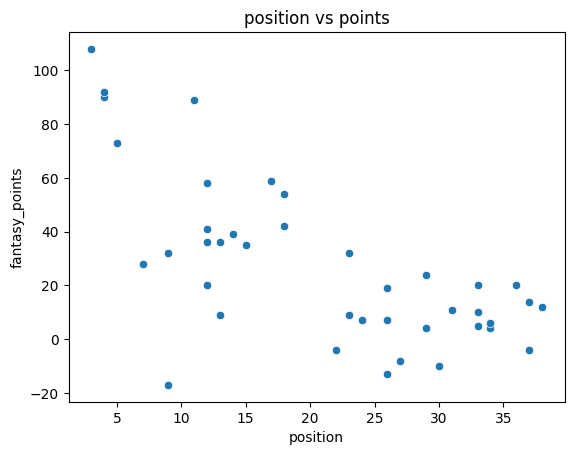

In [111]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")

### Use backward elimination to select our features

In [106]:
# Create the model with everything first
selected_features = ["position"]
y_train = constructor_df["fantasy_points"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = constructor_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = constructor_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['position'] Score: 0.4644327260058121


In [146]:
# Extract Data
x = constructor_df[["position"]]
y = constructor_df["fantasy_points"]

# split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Create the model
c_model = LinearRegression()

# Train the model
c_model = model.fit(x_train, y_train)

print(c_model.coef_, c_model.intercept_)

[-1.9764101] 69.96599022923712


In [147]:
# make predictions on test data
y_pred = c_model.predict(x_test)

In [148]:
# accuracy
c_model.score(x_test, y_test)

0.4794897505508958

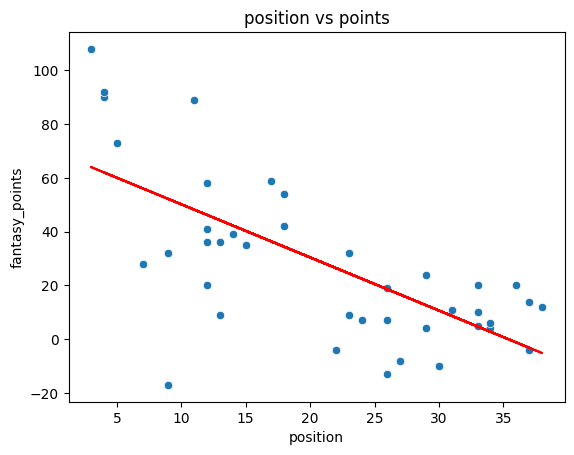

In [149]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")
plt.plot(x_train, c_model.predict(x_train), color='r')

In [150]:
results_df = pd.read_csv("data/constructor_data_mr_test.csv")

In [151]:
results_df["fantasy_points"] = c_model.predict(results_df[["position"]])

In [152]:
results_df = results_df.sort_values(by="fantasy_points", ascending=False)
results_df

,constructor,position,fantasy_points
0,RED_r5,7,56.131120
6,HAA_r5,11,48.225479
3,MCL_r5,18,34.390608
4,AST_r5,20,30.437788
8,KCK_r5,21,28.461378
9,VRB_r5,21,28.461378
7,WIL_r5,23,24.508558
1,FER_r5,27,16.602918
5,ALP_r5,27,16.602918
2,MER_r5,35,0.791637


In [153]:
def fix_name(team):
    return team[0:3]

results_df["constructor"] = results_df["constructor"].map(fix_name) 

results_df

,constructor,position,fantasy_points
0,RED,7,56.131120
6,HAA,11,48.225479
3,MCL,18,34.390608
4,AST,20,30.437788
8,KCK,21,28.461378
9,VRB,21,28.461378
7,WIL,23,24.508558
1,FER,27,16.602918
5,ALP,27,16.602918
2,MER,35,0.791637


In [154]:
print("two reccomended constructors: ")
print(results_df["constructor"][0:2])

two reccomended constructors: 
0    RED
6    HAA
Name: constructor, dtype: object


# Driver model --> logistic regression

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [26]:
df = pd.read_csv("data/driver_data_v4.csv")

In [27]:
# extract data
X = df[["position", "gap_to_leader"]]
y = df["picked"]

# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# create model
model = LogisticRegression()

# train model
model = model.fit(X_train, y_train)

In [28]:
# make predictions on test data
y_pred = model.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual')

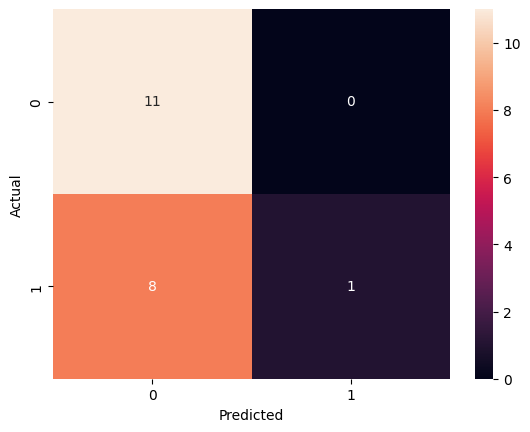

In [29]:
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# plot 
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
model.score(X_test, y_test)

0.6

In [31]:
position = int(input("What position is the driver? "))
gap = float(input("How far behind the leader are they? "))

train = [position, gap]

y_pred = model.predict([train])
print(y_pred)

ValueError: invalid literal for int() with base 10: ''